## Sentiment Analysis on Amazon Product Reviews

By: Sanika Gotarne

Objective:  
Analyze Amazon product reviews and classify them as Positive, Negative, or Neutral using NLP techniques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import pandas as pd
import bz2

file_path = r"C:\Users\sanik\Downloads\train.ft.txt.bz2"

data = []
count = 0

with bz2.open(file_path, 'rt', encoding='utf-8') as file:
    for line in file:
        if count >= 200:   
            break
        if " " in line:
            label, text = line.split(" ", 1)
            data.append([label.replace("__label__", "").strip(), text.strip()])
            count += 1

df = pd.DataFrame(data, columns=['Sentiment', 'Review'])
df.head()


,Sentiment,Review
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


1: Load and preview the dataset

In [16]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

df['Cleaned_Review'] = df['Review'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentiment,Review,Cleaned_Review
0,2,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,2,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,2,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...
3,2,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,2,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


2: Text Cleaning (NLP Preprocessing)
We applied the following cleaning steps:
- Lowercasing text
- Removing punctuation and special characters
- Removing stopwords like 'and', 'is', 'the', etc.


In [11]:
from textblob import TextBlob

df['Sentiment_Score'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()


,Sentiment,Review,Cleaned_Review,Sentiment_Score
0,2,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...,-0.006250
1,2,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...,0.293750
2,2,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...,0.278125
3,2,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...,0.250000
4,2,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...,0.369841


Sentiment Score Calculation
We used TextBlob to calculate the sentiment polarity for each review.
-TextBlob gives a score between -1 and +1, where:
-Score greater than 0 means the review is positive
-Score less than 0 means the review is negative
-Score equal to 0 means the review is neutral
We stored the result in a new column called Sentiment_Score.

In [12]:
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Predicted_Sentiment'] = df['Sentiment_Score'].apply(sentiment_label)
df.head()


,Sentiment,Review,Cleaned_Review,Sentiment_Score,Predicted_Sentiment
0,2,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...,-0.006250,Negative
1,2,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...,0.293750,Positive
2,2,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...,0.278125,Positive
3,2,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...,0.250000,Positive
4,2,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...,0.369841,Positive


Converting Sentiment Score to Positive, Negative, or Neutral
We created a function called sentiment_label that checks each sentiment score and assigns a label:
-If the score is greater than 0, it is marked as Positive
-If the score is less than 0, it is marked as Negative
-If the score is equal to 0, it is marked as Neutral
We applied this function to the Sentiment_Score column and created a new column called Predicted_Sentiment.

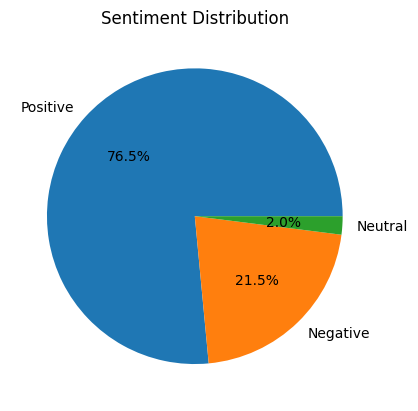

In [13]:
df['Predicted_Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.ylabel('')
plt.show()

Sentiment Distribution Pie Chart
This pie chart shows the percentage of Positive, Negative, and Neutral reviews in the dataset.
It helps us understand which type of sentiment is most common among customers.
The largest section represents the most frequent sentiment category.
Most reviews are Positive, showing customers are satisfied with the product.

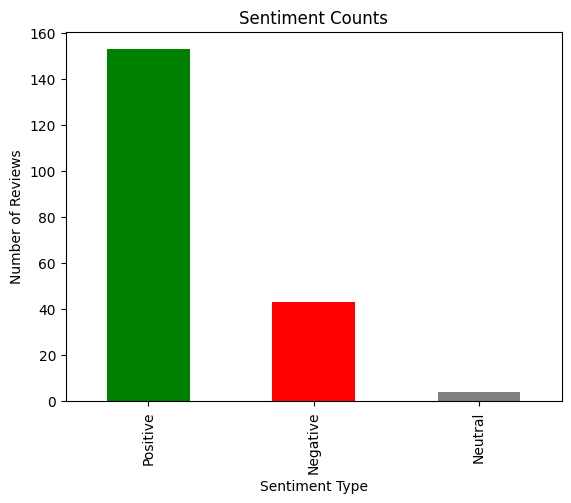

In [14]:
df['Predicted_Sentiment'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title("Sentiment Counts")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.show()

Sentiment Count Bar Chart
This bar chart displays the number of Positive, Negative, and Neutral reviews in the dataset.
It helps to compare how many reviews belong to each sentiment category.
From this chart, we can clearly see which sentiment occurs the most and which is the least common.

Final Conclusion

Insights:
The majority of reviews are positive, showing high customer satisfaction.
Negative reviews mainly mention poor product quality, delivery issues, or packaging problems.
Neutral reviews indicate that some customers had average or mixed experiences.

Business Impact:
Positive feedback can be used to promote products and increase brand trust.
Negative reviews help identify areas for improvement such as product quality and delivery.
Neutral reviews can guide businesses to enhance product features and customer experience.
Sentiment analysis supports better decision-making by understanding real customer opinions.